### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Project Title: Analysis of Student Academic Performance

## Student(s): Ashik Vaghjiyani and Michael Tolvaisa

#### Date: June 3, 2018
---

### 1. Introduction
---

The purpose of this project is to study relationship between students academic achivements and progress based on variety of factors including class participation and parents involvment in their studies. The project utilizes a dataset which tracked students' academic performance over the course of two semesters.

This dataset contains information on a total of 480 students across primary education, middle school, and high school. The dataset includes a total of 305 males and 175 females from 14 different nationalities. 

The dataset features are organized into three major categories:
  1. Demographic features such as gender and nationality.
  2. Academic background such as grade level.
  3. Behavorial features such as class participation and parent participation.

More specifically, the following attributes are present for each student in this database:
  + Demographic Features:
    + Gender
    + Nationality
    + Place of Birth
  + Academic Background
    + Educational Stage (Primary School, Middle School, High School)
    + Grade Levels
    + Classroom Section
    + Course Topic (English, Chemistry, Math, etc.)
    + Semester
  + Behavioral Features
      + Parent Responsible for Student
      + Number of Hands Raised
      + Number of Course Resource Visits
      + Number of Announcement Checks
      + Number of Discussion Group Participations
      + Parental Survey Responses
      + Parental Satisfaction
      + Number of Student Absences
  + Overall Student Performance Level
  
The overall student performance level feature is a measure of how the student performs in their course curriculum. Students are divided into three performance levels based on their overall grade:
  + Low Level: Total Grade below 70
  + Middle Level: Total Grade between 70 and 90
  + High Level: Total Grade above 90

### 2. Problem Definition
---

With our analysis of this dataset, we will be attempting to draw correlations between the academic performance of students and various background features in the lives of these students, including features both directly and indirectly involved in their education. Specific situations we will be analysing include:
  + The relationship between student involvement in courses (participation in-class and in discussions, usage of course resources, number of absences) and student academic performance.
  + The relationship between parent involvement in student life (parental survey responses, parental satisfaction) and student academic performance.
  + Any relationships between student performance and academic background features:
    + Grade Level performance in various Topics.
    + Performance Level change across Semesters for different Grade Levels.
    + Performance Level based on Classroom Section.

Our results may be of interest to school administrators and curicculum writers, allowing for curicculums to be better designed to benefit low-performing students. Results from this study may be utilized in the creation of predictive models which can be used to increase student performance by addressing certain weaknesses in academic and behavioral fields.

### 3. Data Sources
---

This dataset was collected from the Kalboard 360 learning management system using the experience API (xAPI) by a group of researchers from the University of Jordan. It was formatted and uploaded to Kaggle in its current form by Dr. Ibraham Alijarah in November 2016.

This dataset is stored as a .csv file.

This dataset can be accessed directly via the following link: https://www.kaggle.com/aljarah/xAPI-Edu-Data/data

### 4. Analysis
---

In [6]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(10, 7))

# Following modules are required to import dataset using Google Colab
# This will allow you to choose and upload required dataset
import io
from google.colab import files
uploaded = files.upload()

Saving xAPI-Edu-Data.csv to xAPI-Edu-Data (1).csv


In [ ]:
# Reading csv file

students_performance = pd.read_csv(io.StringIO(uploaded['xAPI-Edu-Data.csv'].decode('utf-8')), header=0)
#students_performance.head()

In [ ]:
# Changing few of the column names to understand their purpose
# "StageID" to "Educational_Level" & "Class" to "Performance_Level"

students_performance.rename(columns={'StageID' : 'Educational_Level', 'Class' : 'Performance_Level'}, inplace=True)
#students_performance.head()

### Comparing number of hands raised and performance level:

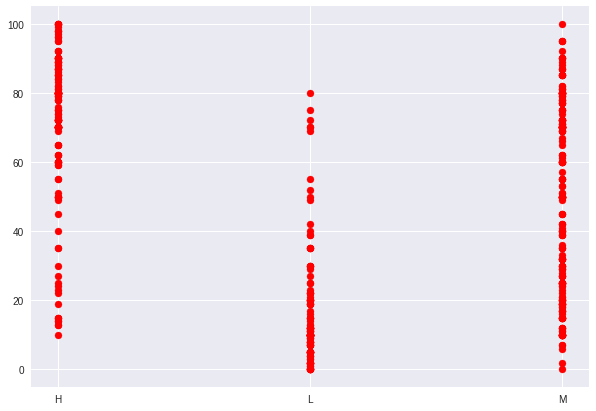

In [11]:
x = students_performance['Performance_Level'].values
y = students_performance['raisedhands'].values
ax = plt.scatter(x, y, c='red')

### Comparing discussion participation and performance level:

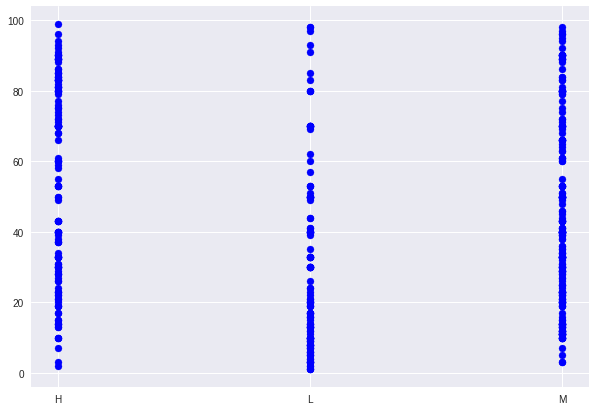

In [12]:
x = students_performance['Performance_Level'].values
y = students_performance['Discussion'].values
ax = plt.scatter(x, y, c='blue')

### Comparing number of absences and performance level:

In [13]:
students_performance.StudentAbsenceDays.value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd36e43cc0>,
      dtype=object)

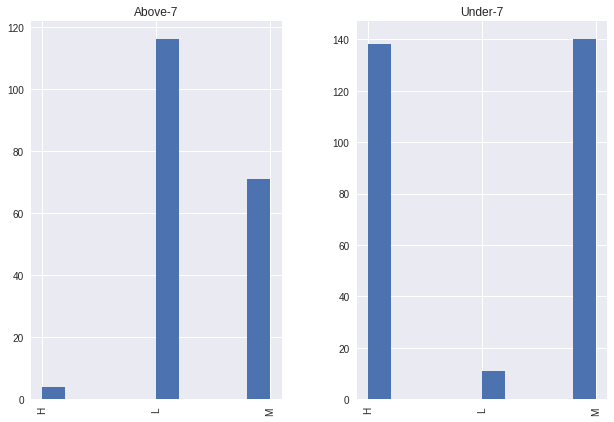

In [14]:
students_performance.hist(column='Performance_Level', by='StudentAbsenceDays', grid=True)

In [ ]:
low = students_performance[students_performance['VisITedResources'] < 40]

med = students_performance[(students_performance['VisITedResources'] > 40) &
                          (students_performance['VisITedResources'] < 80)]

high = students_performance[students_performance['VisITedResources'] > 80]

df = low,med,high.cumsum()

In [16]:
x = low.shape[0], med.shape[0], high.shape[0]
x

(173, 120, 154)

### Finding relaionship between course resources utilized and performance level:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdd36de2048>,
      dtype=object)

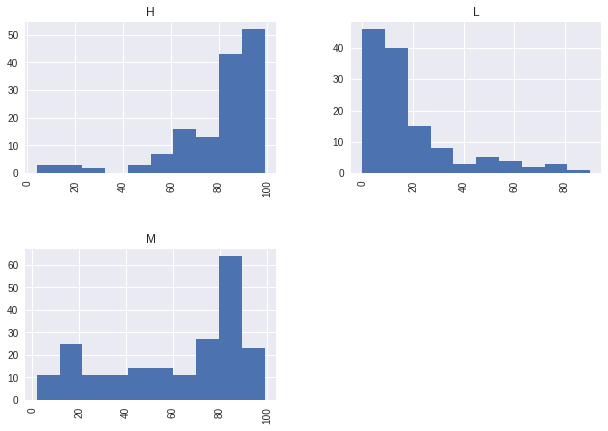

In [17]:
students_performance.hist(column='VisITedResources', by='Performance_Level', grid=True,)

### Correlating overall course participation and student performance level:

Text(0.5,1,'Student Performance vs. Course Participation')

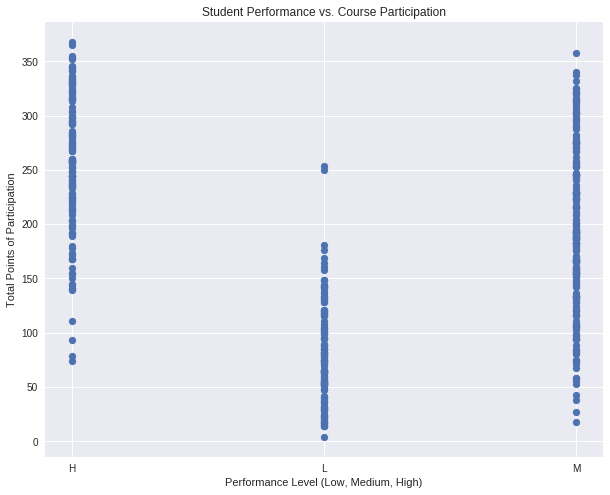

In [18]:
# Create participation dataframe containing total participation and performance level for each student
participation = pd.concat([students_performance[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].sum(axis = 1), students_performance['Performance_Level']], axis = 1)
# Format participation dataframe
participation.columns = ['ParticipationTotal', 'PerformanceLevel']
# Sort participation by performance level (low, medium, high)
performance_dict = {'L' : 0, 'M' : 1, 'H' : 2}
participation['PerformanceNum'] = participation['PerformanceLevel'].map(performance_dict)
participation.sort_values(by = ['PerformanceNum'], inplace = True)

# Plot performance level against total participation
fig1 = plt.figure(figsize = (10, 8))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.scatter(x = participation['PerformanceLevel'], y = participation['ParticipationTotal'])
ax1.set_ylabel("Total Points of Participation")
ax1.set_xlabel("Performance Level (Low, Medium, High)")
ax1.set_title("Student Performance vs. Course Participation")

The above graph compares student performance against total course participation (number of raised hands, number of class resources visited, number of announcements viewed, and number of discussion contributions).

**Notable takeaways:**
  + There is a clear correlation between low- and high-performing students and total participation by these students, with high-performing students demonstrating high amounts of participation, and vice versa.
  + However, middle-performing students demonstrate a large range of participation.
  + Two low-performing students and four high-performing students have demonstrated course participation high above and below the norm, respectively. These students may be worth looking further into given the objectives of this analysis

### Additional considerations:

There are several additional problems we would like to look into beyond the scope of this dataset. These problems include:
  + Possible correspondances between academic performance and languages spoken by students.
  + Analysis of low-performing students who demostrated high class involvement behaviors.
  + Further analysis of results of parental satisfaction surveys to address specific areas of satisfaction or dissatifaction, as well as to consider the level of satisfaction or dissatisfaction in these areas.
  + Potential follow-up studies to include new data and create comparisons between current and previous datasets.

### Works Referenced:

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

Amrieh, E. A., Hamtini, T., & Aljarah, I. (2015, November). Preprocessing and analyzing educational data set using X-API for improving student's performance. In Applied Electrical Engineering and Computing Technologies (AEECT), 2015 IEEE Jordan Conference on (pp. 1-5). IEEE.

## Extra

Text(0.5,1,'Student Performance vs. Course Participation')

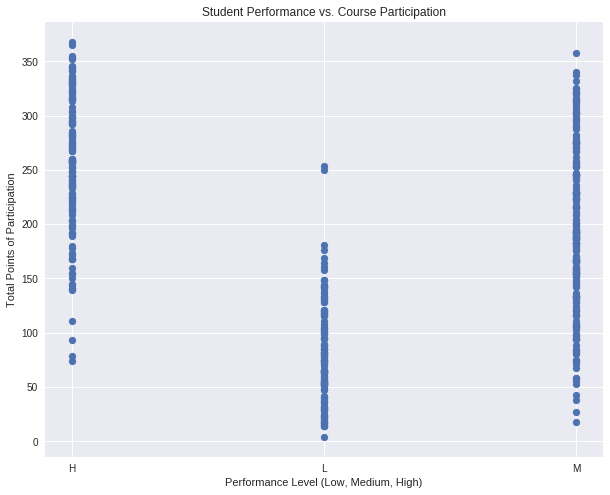

In [10]:
# Create participation dataframe containing total participation and performance level for each student
participation = pd.concat([students_performance[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].sum(axis = 1), students_performance['Performance_Level']], axis = 1)
# Format participation dataframe
participation.columns = ['ParticipationTotal', 'PerformanceLevel']
# Sort participation by performance level (low, medium, high)
performance_dict = {'L' : 0, 'M' : 1, 'H' : 2}
participation['PerformanceNum'] = participation['PerformanceLevel'].map(performance_dict)
participation.sort_values(by = ['PerformanceNum'], inplace = True)

# Plot performance level against total participation
fig1 = plt.figure(figsize = (10, 8))
ax1 = fig1.add_subplot(1, 1, 1)
ax1.scatter(x = participation['PerformanceLevel'], y = participation['ParticipationTotal'])
ax1.set_ylabel("Total Points of Participation")
ax1.set_xlabel("Performance Level (Low, Medium, High)")
ax1.set_title("Student Performance vs. Course Participation")